https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

In [14]:
""" Packages """
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [2]:
""" Read the cross validation dataset """
cross_val_data = pd.read_csv ('For_10_Fold_Cross_Validation.csv')

In [3]:
""" Check the shape of the read dataset"""
cross_val_data.shape

(9690, 2305)

In [7]:
""" Take a look at all the features and class attribute name """
cross_val_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,65.0,52.0,58.0,67.0,52.0,64.0,58.0,49.0,56.0,61.0,...,38.0,55.0,70.0,83.0,74.0,55.0,72.0,73.0,77.0,one
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,130.0,46.0,42.0,31.0,26.0,25.0,26.0,one
2,35.0,35.0,35.0,34.0,34.0,35.0,36.0,38.0,42.0,44.0,...,60.0,61.0,52.0,44.0,39.0,33.0,27.0,30.0,32.0,two
3,98.0,97.0,92.0,80.0,82.0,83.0,84.0,86.0,85.0,85.0,...,15.0,14.0,14.0,14.0,14.0,15.0,15.0,15.0,15.0,four
4,255.0,255.0,255.0,255.0,251.0,225.0,232.0,252.0,247.0,254.0,...,251.0,249.0,247.0,247.0,245.0,206.0,87.0,46.0,47.0,eight


In [17]:
""" For training the classifier define the features and class attribute """

X_Train = cross_val_data.drop('Class', axis = 1)

y_train = cross_val_data['Class']

In [18]:
""" Scale the data """
sc = StandardScaler()
X_train = sc.fit_transform(X_Train)

Cross validation on the original Training dataset

In [23]:
""" Run the classifier using 10 fold cross validation """
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X_train, y_train, cv=10)

""" scores array """
scores

array([0.94117647, 0.93601651, 0.93085655, 0.9370485 , 0.95562436,
       0.95356037, 0.93292054, 0.94117647, 0.93498452, 0.94633643])

In [24]:
""" Get an average accuracy """

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.02)


In [28]:
""" Get the F scores """

scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')

In [29]:
print(scores)

[0.92741105 0.94677045 0.90956302 0.94363667 0.94397611 0.95771793
 0.93497895 0.92902128 0.92516091 0.94647954]


Test Train split on the original Training dataset

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
X_train, y_train, test_size=0.4, random_state=0)

In [64]:
cf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [65]:
cf.score(X_test, y_test)

0.934984520123839

Predictions using the Train (original) and Test (new) datasets

In [32]:
""" Read the test dataset """
Test = pd.read_csv ('Test_Dataset.csv')

In [33]:
Test.shape

(3090, 2305)

In [34]:
Test.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,22.0,23.0,24.0,24.0,24.0,22.0,20.0,24.0,25.0,26.0,...,24.0,24.0,24.0,24.0,24.0,24.0,23.0,23.0,22.0,two
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,200.0,226.0,243.0,253.0,246.0,240.0,249.0,247.0,242.0,six
2,173.0,187.0,168.0,118.0,63.0,118.0,107.0,131.0,164.0,119.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,four
3,52.0,52.0,54.0,57.0,59.0,60.0,61.0,58.0,57.0,56.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,two
4,235.0,156.0,121.0,70.0,44.0,66.0,86.0,94.0,106.0,110.0,...,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,254.0,one


In [40]:
""" For testing """

X_Test = Test.drop('Class', axis = 1)

y_test = Test['Class']

In [41]:
""" Scale the test data """
sc = StandardScaler()
X_Test = sc.fit_transform(X_Test)

In [37]:
""" Set up the classifier """
classifier = svm.SVC(gamma=0.001)

In [39]:
""" Fit the training data """
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [43]:
""" Predict the test data """
predicted = classifier.predict(X_Test)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

       eight       0.58      0.37      0.45       150
        five       1.00      0.50      0.67        60
        four       0.76      0.71      0.73       660
        nine       0.64      0.43      0.52        90
         one       0.57      0.79      0.66       720
       seven       1.00      0.20      0.33        60
         six       0.72      0.34      0.47        90
       three       0.67      0.63      0.65       450
         two       0.68      0.72      0.70       750
        zero       0.50      0.05      0.09        60

    accuracy                           0.66      3090
   macro avg       0.71      0.47      0.53      3090
weighted avg       0.67      0.66      0.65      3090


Confusion matrix:
[[ 55   0   0   4  62   0   5  15   9   0]
 [  0  30  30   0   0   0   0   0   0   0]
 [  0   0 469   0 103   0   0  58  30   0]
 [  3   0   0  39  27   0   0   0  21 

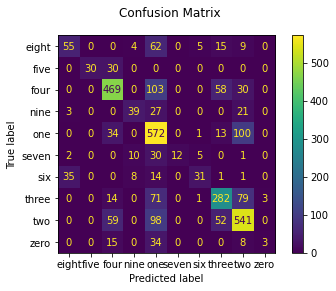

In [44]:
""" Confusion matrix of the predictions using the test data set """

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_Test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)


Predictions using the Train-Test-4000 dataset

In [46]:
""" Read the 4000 Train and Test datasets """
Train4000 = pd.read_csv ('Train_Dataset_4000.csv')
Test4000 = pd.read_csv ('Test_Dataset_4000.csv')

In [47]:
""" For training and testing """

X4000_Train = Train4000.drop('Class', axis = 1)
y4000_train = Train4000 ['Class']

X4000_Test = Test4000.drop('Class', axis = 1)
y4000_test = Test4000['Class']

In [48]:
""" Scale the test data """
sc = StandardScaler()
X4000_train = sc.fit_transform(X4000_Train)
X4000_test = sc.fit_transform(X4000_Test)


In [49]:
""" Set up the classifier """
classifier = svm.SVC(gamma=0.001)

In [50]:
""" Fit the training data """
classifier.fit(X4000_train, y4000_train)

SVC(gamma=0.001)

In [51]:
""" Predict the test data """
predicted = classifier.predict(X4000_test)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

       eight       0.85      0.60      0.70       376
        five       1.00      0.66      0.80       145
        four       0.83      0.83      0.83      1474
        nine       0.83      0.65      0.73       202
         one       0.68      0.86      0.76      1634
       seven       1.00      0.54      0.70       146
         six       0.84      0.60      0.70       242
       three       0.74      0.75      0.74      1036
         two       0.79      0.78      0.78      1691
        zero       0.98      0.43      0.60       144

    accuracy                           0.77      7090
   macro avg       0.85      0.67      0.74      7090
weighted avg       0.78      0.77      0.77      7090


Confusion matrix:
[[ 225    0    8    3   93    0   12   21   14    0]
 [   4   96   39    0    4    0    1    0    1    0]
 [   0    0 1227    0  131    0    0   56   60    0]
 [   4  

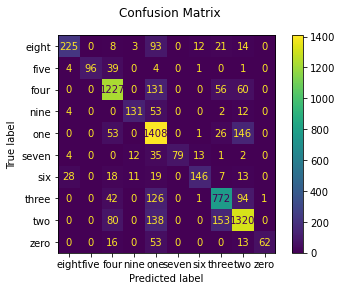

In [52]:
""" Confusion matrix of the predictions using the test data set """

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y4000_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X4000_test, y4000_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Predictions using the Train-Test-9000 dataset

In [56]:
""" Read the 9000 Train and Test datasets """
Train9000 = pd.read_csv ('Train_Dataset_9000.csv')
Test9000 = pd.read_csv ('Test_Dataset_9000.csv')

In [57]:
""" For training and testing """

X9000_Train = Train9000.drop('Class', axis = 1)
y9000_train = Train9000 ['Class']

X9000_Test = Test9000.drop('Class', axis = 1)
y9000_test = Test9000['Class']

In [58]:
""" Scale the test data """
sc = StandardScaler()
X9000_train = sc.fit_transform(X9000_Train)
X9000_test = sc.fit_transform(X9000_Test)

In [59]:
""" Set up the classifier """
classifier = svm.SVC(gamma=0.001)

In [60]:
""" Fit the training data """
classifier.fit(X9000_train, y9000_train)

SVC(gamma=0.001)

In [61]:
""" Predict the test data """
predicted = classifier.predict(X9000_test)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

       eight       0.76      0.39      0.52       508
        five       1.00      0.13      0.23       195
        four       0.55      0.70      0.61      1838
        nine       1.00      0.07      0.13       252
         one       0.53      0.65      0.58      2063
       seven       0.79      0.49      0.60       219
         six       0.67      0.30      0.41       336
       three       0.76      0.40      0.52      1308
         two       0.52      0.70      0.59      2089
        zero       0.64      0.12      0.20       192

    accuracy                           0.56      9000
   macro avg       0.72      0.39      0.44      9000
weighted avg       0.61      0.56      0.54      9000


Confusion matrix:
[[ 200    0   70    0  183    1   28    1   25    0]
 [  20   25   30    0   30   26    8    2   54    0]
 [   0    0 1285    0  268    0    0   28  246   11]
 [  29  

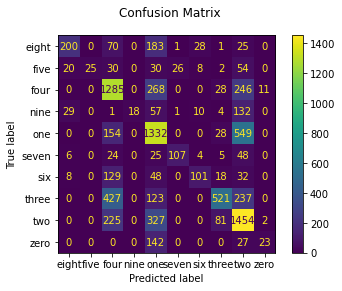

In [62]:
""" Confusion matrix of the predictions using the test data set """

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y9000_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X9000_test, y9000_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

Predictions using Training and Test datasets with Top 20 features

In [3]:
""" Read the Exploratory Train and Test datasets """
Exploratory_Train = pd.read_csv ('Top_20_Exploratory_random.csv')
Exploratory_Test = pd.read_csv ('Test_Exploratory_random.csv')

In [5]:
""" For training and testing """

XExp_Train = Exploratory_Train.drop('Class', axis = 1)
yExp_train = Exploratory_Train ['Class']

XExp_Test = Exploratory_Test.drop('Class', axis = 1)
yExp_test = Exploratory_Test['Class']

In [6]:
""" Scale the test data """
sc = StandardScaler()
XExp_train = sc.fit_transform(XExp_Train)
XExp_test = sc.fit_transform(XExp_Test)

In [7]:
""" Set up the classifier """
classifier = svm.SVC(gamma=0.001)

In [8]:
""" Fit the training data """
classifier.fit(XExp_train,yExp_train)

SVC(gamma=0.001)

In [9]:
""" Predict the test data """
predicted = classifier.predict(XExp_test)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

       eight       0.62      0.65      0.63       150
        five       0.67      0.50      0.57        60
        four       0.76      0.85      0.80       660
        nine       0.75      0.58      0.65        90
         one       0.82      0.82      0.82       720
       seven       0.85      0.48      0.62        60
         six       0.59      0.39      0.47        90
       three       0.74      0.94      0.83       450
         two       0.89      0.80      0.84       750
        zero       0.75      0.25      0.38        60

    accuracy                           0.79      3090
   macro avg       0.74      0.63      0.66      3090
weighted avg       0.79      0.79      0.78      3090



Confusion matrix:
[[ 97   3   0  12   3   0  22  12   1   0]
 [  0  30  29   0   0   0   0   1   0   0]
 [  1   0 562   3  40   0   0  28  26   0]
 [ 23  11   0  52   0   1   1   0   2

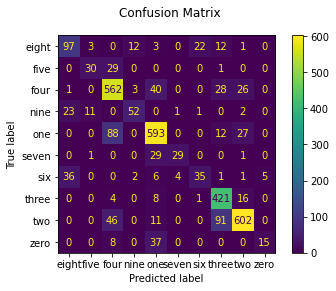

In [12]:
""" Confusion matrix of the predictions using the test data set """

print("Classification report for classifier %s:\n%s\n\n"
      % (classifier, metrics.classification_report(yExp_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, XExp_test, yExp_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

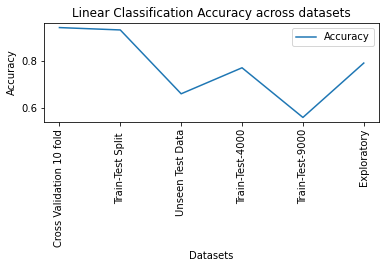

In [23]:
pyplot.subplot(212)
Datasets = ['Cross Validation 10 fold', 'Train-Test Split ', 'Unseen Test Data',
            'Train-Test-4000', 'Train-Test-9000', 'Exploratory']

Accuracy = [0.94, 0.93, 0.66, 0.77, 0.56,
         0.79]

pyplot.title('Linear Classification Accuracy across datasets')
pyplot.plot(Datasets, Accuracy, label = 'Accuracy')

pyplot.xticks(rotation=90)
pyplot.ylabel('Accuracy')
pyplot.xlabel('Datasets')
pyplot.legend()
pyplot.show()